In [2]:
from typing import List
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib import animation

# Resumo das Aulas Práticas de AI

## Máquina de Turing

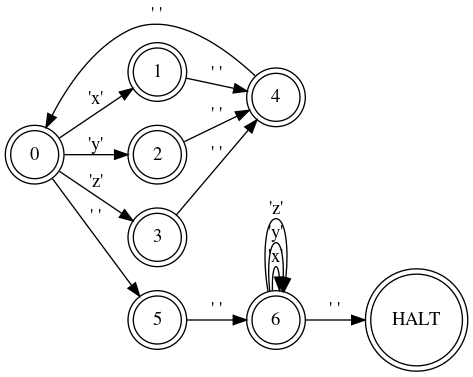

In [3]:
Image('https://raw.githubusercontent.com/tiago-santos-ulus/ai_2020/master/assets/turing_machine_state_diagram.png')

### Programa
Conjunto e instruções
* Posição 0 - Nó atual da máquina
* Posição 1 - Caracter a ler na tape
* Posição 2 - Caracter a escrever na tape
* Posição 3 - Direcção a mover na tape (L para esquerda e R para direita)
* Posição 4 - Nó que a máquina transita

Tem de existir uma instrução que termina a máquina normalmente esta intrução transita para o HALT

In [4]:
program = [
    ['0', ' ', ' ', 'L', '5'],
    ['0', 'x', ' ', 'L', '1'],
    ['0', 'y', ' ', 'L', '2'],
    ['0', 'z', ' ', 'L', '3'],
    ['1', ' ', 'x', 'R', '4'],
    ['2', ' ', 'y', 'R', '4'],
    ['3', ' ', 'z', 'R', '4'],
    ['4', ' ', ' ', 'R', '0'],
    ['5', ' ', ' ', 'L', '6'],
    ['6', ' ', ' ', 'R', 'HALT'],
    ['6', 'x', 'x', 'L', '6'],
    ['6', 'y', 'y', 'L', '6'],
    ['6', 'z', 'z', 'L', '6']
]

## Estado da Máquina
Lista cuja a:
* Posição 0 - Corresponde à posição da tape
* Posição 1 - Corresponde ao nó atual da máquina

In [5]:
machine_state = [3,'0']

## Tape
Lista de simbolos do alfabeto definido

In [6]:
tape = [' ',' ',' ','x','x','y','z','z',' ',' ',' ',' ']

In [7]:
def getAction(condition, program):
    res = -1
    for instruction in program:
        if instruction[0] == condition[0] and instruction[1] == condition[1] :
            res = [instruction[2], instruction[3], instruction[4]]
            print('Matched instruction is ', res)
    return res

In [8]:
def updateTape(tape, pos, wrt):
    tape[pos] = wrt
    return tape

In [9]:
def updateMachine(machine, tape, mv, newstate):
    if mv == 'L':
        machine[0] = machine[0] -1
    elif mv == 'R':
        machine[0] = machine[0] +1
        
    machine[1] = newstate
    if machine[0] >= 0 and machine[0] <= len(tape):
        return machine
    else:
        return -1

In [10]:
def executeStep(machine, tape, program):
    condition = [machine[1], tape[machine[0]]]
    print('Matched condition ', condition)
    action = getAction(condition, program)
    tape = updateTape(tape, machine[0], action[0])
    machine = updateMachine(machine, tape, action[1], action[2])
    return [machine, tape]

In [11]:
def runMachine(machine, tape, program):
    ltape = tape
    lm = machine
    i = 1
    while lm[1] != 'HALT':
        print('Step ', i, ': ', ltape, 'machine is in pos', machine[0])
        um = executeStep(lm, ltape, program)
        lm = um[0]
        ltape = um[1]
        i += 1
        print()

In [12]:
runMachine(machine_state, tape, program)

Step  1 :  [' ', ' ', ' ', 'x', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' '] machine is in pos 3
Matched condition  ['0', 'x']
Matched instruction is  [' ', 'L', '1']

Step  2 :  [' ', ' ', ' ', ' ', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' '] machine is in pos 2
Matched condition  ['1', ' ']
Matched instruction is  ['x', 'R', '4']

Step  3 :  [' ', ' ', 'x', ' ', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' '] machine is in pos 3
Matched condition  ['4', ' ']
Matched instruction is  [' ', 'R', '0']

Step  4 :  [' ', ' ', 'x', ' ', 'x', 'y', 'z', 'z', ' ', ' ', ' ', ' '] machine is in pos 4
Matched condition  ['0', 'x']
Matched instruction is  [' ', 'L', '1']

Step  5 :  [' ', ' ', 'x', ' ', ' ', 'y', 'z', 'z', ' ', ' ', ' ', ' '] machine is in pos 3
Matched condition  ['1', ' ']
Matched instruction is  ['x', 'R', '4']

Step  6 :  [' ', ' ', 'x', 'x', ' ', 'y', 'z', 'z', ' ', ' ', ' ', ' '] machine is in pos 4
Matched condition  ['4', ' ']
Matched instruction is  [' ', 'R', '0']

Step  7 :  [' ', ' ', 

## Uninformed Search

Objetivo - Ir do nó S ao nó E

### Search Graph

In [13]:
Image('./graph.png')

FileNotFoundError: No such file or directory: './graph.png'

FileNotFoundError: No such file or directory: './graph.png'

<IPython.core.display.Image object>

## Adjacency List

In [14]:
g = {
    's': {'a', 'b', 'c'},
    'a': {'b', 'd', 's'},
    'b': {'d', 'h', 's'},
    'c': {'l', 's'},
    'd': {'a', 'b', 'f'},
    'e': {'g', 'k'},
    'f': {'d', 'h'},
    'g': {'e', 'h'},
    'h': {'b', 'f', 'g'},
    'i': {'j', 'k', 'l'},
    'j': {'i', 'k', 'l'},
    'k': {'e', 'i', 'j'},
    'l': {'c', 'i', 'j'},
}

In [15]:
def build_graph(graph, start, goal, visited):
    G = nx.Graph()
    for node in graph:
        for child in graph[node[0]]:
            G.add_edge(node, child)
            
    color_map = []
    for node in G.nodes():
        if node == start:
            color_map.append('lightGreen')
        elif node == goal:
            color_map.append('red')
        elif node in visited:
            color_map.append('gray')
        else:
            color_map.append('gray')
            
    nx.draw(G, with_labels=True, node_color=color_map)

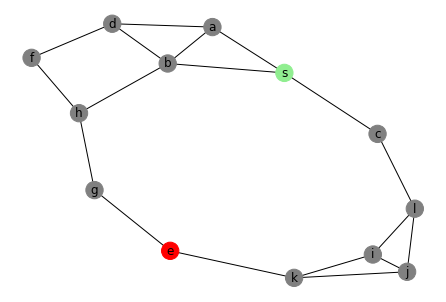

In [16]:
build_graph(g, 's', 'e', {})

### British Museam
Esta é a solução mais simples. Trata-se de  expandir todos os caminhos possíveis e explorá-los a todos à procura do caminho mais curto.

In [17]:
def bm(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        (vertex, path) = q.pop(0)
        for next in graph[vertex] - set(path):
            i += 1
            if next == goal:
                print("Total iterations: ", i)
                print("Path: ", path + [next] )
                return
            else:
                q.append((next, path + [next]))

In [18]:
bm(g, 's', 'e')

Total iterations:  29
Path:  ['s', 'b', 'h', 'g', 'e']


### Breadth-First Search

In [19]:
def bfs(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1]:
                    e_filter.append(node)
            e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
            q = r + sorted(e)

In [20]:
bfs(g, 's', 'e')

Total iterations:  27
Path:  ['s', 'b', 'h', 'g', 'e']


### Depth-First Search

In [21]:
def dfs(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1]:
                    e_filter.append(node)
            e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
            q = sorted(e) + r

In [22]:
dfs(g, 's', 'e')

Total iterations:  8
Path:  ['s', 'a', 'b', 'd', 'f', 'h', 'g', 'e']


## Informed Search

### Search Graph

In [23]:
Image('./graph2.png')

FileNotFoundError: No such file or directory: './graph2.png'

FileNotFoundError: No such file or directory: './graph2.png'

<IPython.core.display.Image object>

### Adjacency List

In [24]:
g = {
    's': {('a', 7), ('b', 2), ('c', 3)},
    'a': {('b', 3), ('d', 4), ('s', 7)},
    'b': {('d', 4), ('h', 1), ('s', 2)},
    'c': {('l', 2), ('s', 3)},
    'd': {('a', 4), ('b', 4), ('f', 5)},
    'e': {('g', 2), ('k', 5)},
    'f': {('d', 5), ('h', 4)},
    'g': {('e', 2), ('h', 2)},
    'h': {('b', 1), ('f', 4), ('g', 2)},
    'i': {('j', 6), ('k', 4), ('l', 4)},
    'j': {('i', 6), ('k', 4), ('l', 4)},
    'k': {('e', 5), ('i', 4), ('j', 4)},
    'l': {('c', 2), ('i', 4), ('j', 4)},
}

### Dijkstra

In [25]:
def dijkstra(graph, start, goal):
    q = [(start, [start], 0)]
    [('s', ['s'], 0)]
    done = set()
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            print("Cost: ", h[2])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1] and node[0] not in done:
                    e_filter.append(node)
            e = [(e_final[0], h[1] + [e_final[0]], h[2] + e_final[1]) for e_final in e_filter]
            done.add(h[0])
            q = sorted(e + r, key=lambda tup: (tup[2], tup[0]))

In [26]:
dijkstra(g, 's', 'e')

Total iterations:  9
Path:  ['s', 'b', 'h', 'g', 'e']
Cost:  7


### A*

In [27]:
heuristics = {
    's': 10,
    'a': 9,
    'b': 7,
    'c': 8,
    'd': 8,
    'e': 0,
    'f': 6,
    'g': 3,
    'h': 6,
    'i': 4,
    'j': 4,
    'k': 5,
    'l': 6
}

In [28]:
def a_star(graph, start, goal, heuristics):
    q = [(start, [start], 0, heuristics[start], 0 + heuristics[start])]
    done = set()
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            print("Cost: ", h[2])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1] and node[0] not in done:
                    e_filter.append((node[0], node[1], heuristics[node[0]]))
            e = [(e_final[0], h[1] + [e_final[0]], h[2] + e_final[1], e_final[2], h[2] + e_final[1] + e_final[2]) for e_final in e_filter]
            done.add(h[0])
            q = sorted(e + r, key=lambda tup: (tup[4], tup[3]))

In [29]:
a_star(g, 's', 'e', heuristics)

Total iterations:  5
Path:  ['s', 'b', 'h', 'g', 'e']
Cost:  7
